#Libraries and data

In [1]:
#change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/Ensemble

/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/Ensemble


In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#import the predictions
df = pd.concat(map(pd.read_csv, ['predictions_prophet.csv',
                                 'predictions_sarimax.csv',
                                 'predictions_silverkite.csv',
                                 'predictions_lstm.csv']),
               axis = 1)
df.head()

,ds,prophet,Date,sarimax,Unnamed: 0,Date,silverkite,Date,lstm
0,2021-01-01,736.659172,2021-01-01,739.874427,2192,2021-01-01,749.765876,2021-01-01,754.135212
1,2021-01-02,848.735492,2021-01-02,856.312075,2193,2021-01-02,833.972984,2021-01-02,898.053968
2,2021-01-03,766.750844,2021-01-03,767.567526,2194,2021-01-03,752.560592,2021-01-03,783.025162
3,2021-01-04,892.862492,2021-01-04,907.626362,2195,2021-01-04,897.718351,2021-01-04,942.911663
4,2021-01-05,762.827968,2021-01-05,779.803524,2196,2021-01-05,778.789269,2021-01-05,789.413242


In [9]:
#Fetch what we need
df = df[["ds", "prophet", "sarimax", "silverkite", "lstm"]]
df.head(2)

,ds,prophet,sarimax,silverkite,lstm
0,2021-01-01,736.659172,739.874427,749.765876,754.135212
1,2021-01-02,848.735492,856.312075,833.972984,898.053968


In [10]:
#index 
df.index = df.pop('ds')
df.head(1)

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,736.659172,739.874427,749.765876,754.135212


#Ensemble

In [11]:
#change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product

/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product


In [23]:
#getting the error
error_prophet = float(pd.read_csv("best_params_prophet.csv").iloc[4,1])
error_sarimax = pd.read_csv("best_params_sarimax.csv").iloc[6,1]
error_silverkite = float(pd.read_csv("best_params_silverkite.csv").iloc[0,1])
error_lstm = pd.read_csv("best_params_lstm.csv").iloc[7,1]

In [24]:
#average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm)/4
print(f"The average error is {average_error}")

The average error is 59.7971526186058


In [26]:
#Initial Weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f"The Prophet weight is {weight_prophet}")

weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f"The SARIMAX weight is {weight_sarimax}")

weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f"The Silverkite weight is {weight_silverkite}")

weight_lstm = 0.25 / (error_lstm / average_error)
print(f"The LSTM weight is {weight_lstm}")

The Prophet weight is 0.3110350192383899
The SARIMAX weight is 0.24934079162714207
The Silverkite weight is 0.3127466141140471
The LSTM weight is 0.17931185659401283


In [27]:
#Extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Adding the weights equals to {extra_weight}")

Adding the weights equals to 1.0524342815735919


#Ensemble Forecast

In [31]:
#Ensemble
df['ensemble'] = (df.prophet * weight_prophet + df.sarimax * weight_sarimax + df.silverkite * weight_silverkite + df.lstm * weight_lstm) / extra_weight

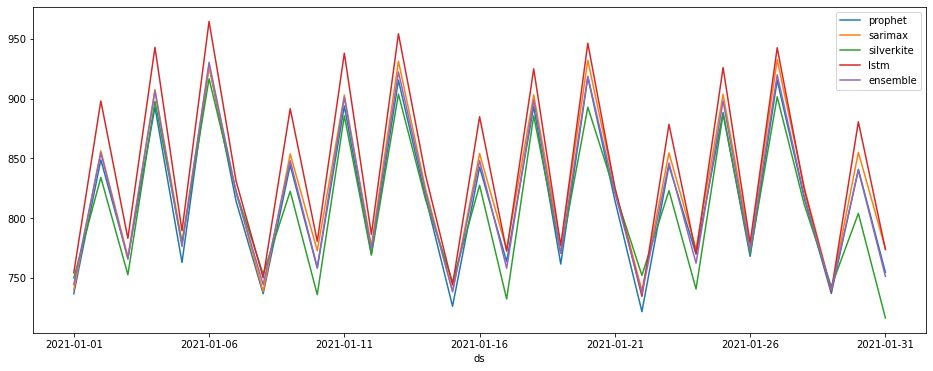

In [33]:
#Visualization
df.plot(figsize = (16,6), legend = True)